<a href="https://colab.research.google.com/github/xesmaze/cpsc541-fall2024/blob/main/lab_3/Crop_Modeling_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Crop Modeling Process Walkthrough


For this lab, we will follow through the process of solving a research problem. In our hypothetical research (my actual research) we’re trying to evaluate how temperature during the seed fill period of soybean development affects final seed composition. To be able to measure temperature during seed fill, we need to be able to estimate the start and end of this period for each of our trials.

> Data Cleaning and Exploration
* A large part of working with data is data manipulation and cleaning.
* Visualization will help you understand the immediate patterns in your data, and can also help you identify where you may have problems with your dataset.
* You can’t produce a sensible analysis from nonsensical data.


The data we have to work with:
- Dataset one (D1): trial ID, day of observation, recorded R stage, cultivar maturity.
- Dataset two (D2): trial ID, site, planting date, maturity date, cultivar maturity.
- Daily weather data for each of our sites.

Dataset one doesn’t have daily data, so we don’t know the exact dates when the cultivars transitioned between R stages.


> Deciding on a Method of Analysis
* What do you have, where are you going? In a complex data analysis pipeline, it may be helpful to diagram the process of analysis.
* Know what kinds of analysis will give you the results you’re looking for and are suitable for your data. What are the strengths and weaknesses of different models? When should they be applied?

APSIM is a commonly used research plant model. APSIM simulates the growth of a plant over a season, and allows the user to control parameters relating to environmental conditions, management decisions, and the properties of the plant itself.




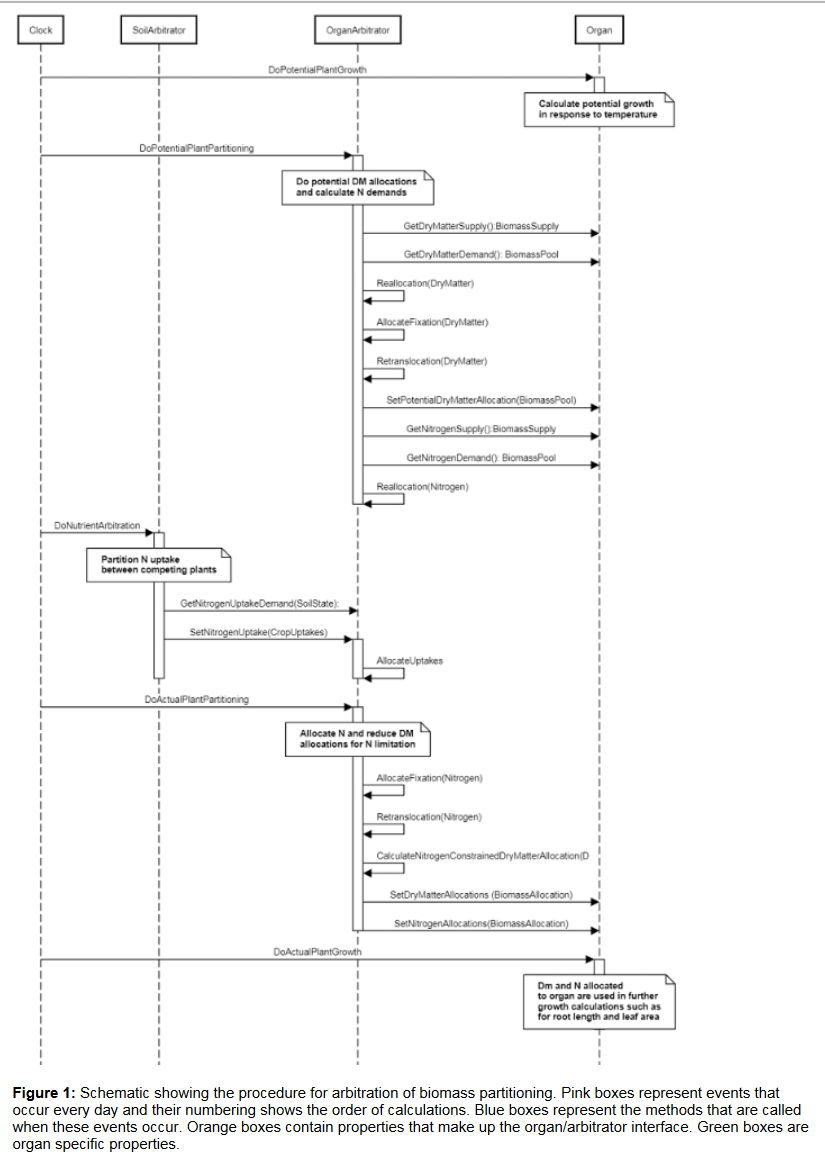

Within an APSIM model, a crop is planted, accumulates GDD (growing degree days) as time passes, and passes through each stage of development as the GDD meets check values.

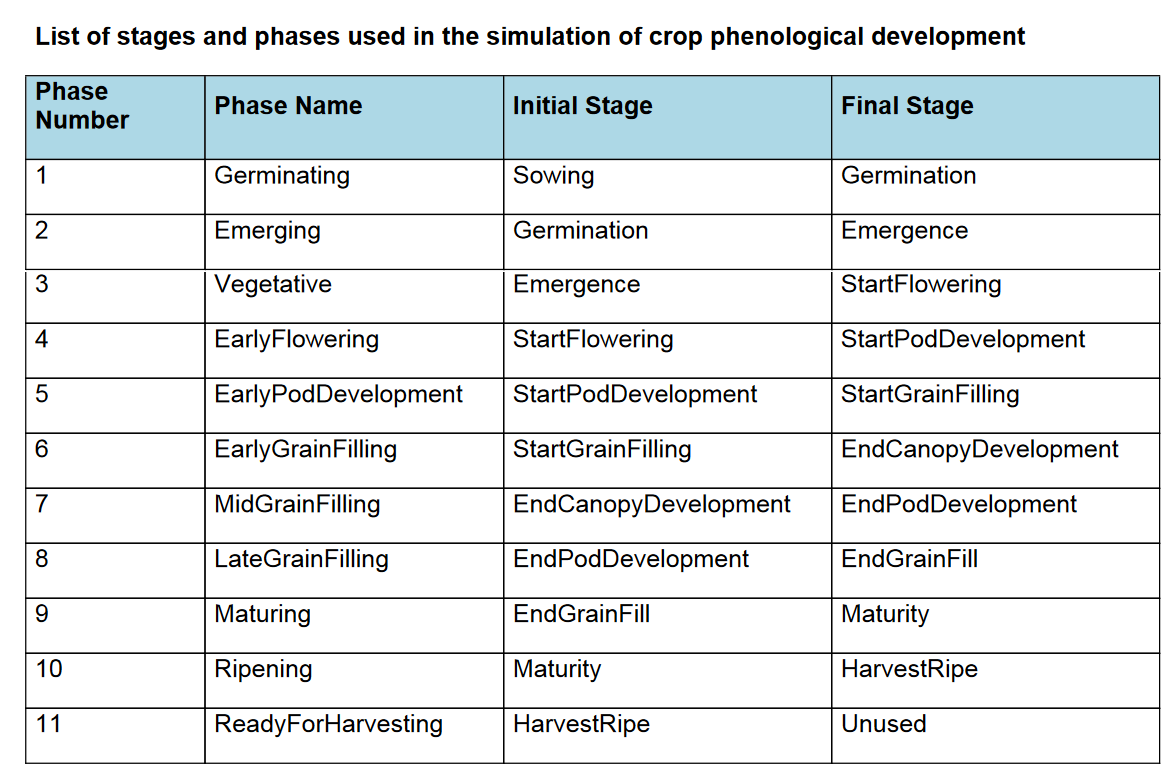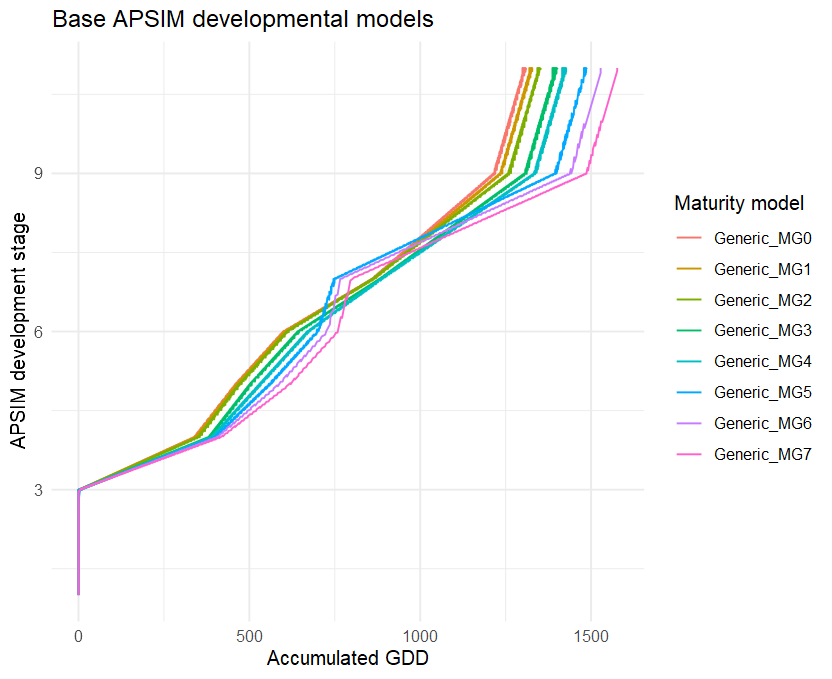



By default, the APSIM soybean module has several different maturity models corresponding to different cultivar maturities. Each of the different maturity models has different check values for when to progress from one stage to the next.

The plan would be to run our trials, with all associated parameters, through APSIM and have APSIM return the dates when each trial starts and ends seed fill.

To make sure that our APSIM program is accurately estimating the crop’s development, we should judge its predictions versus known data. While we don’t have the actual critical periods for each of our trials, we do have another measurement of development: maturity. Because we have the actual data for when we observed each of the trials reaching maturity, we can compare this to when APSIM estimated that the trials would reach maturity to judge how accurately APSIM is modeling the cultivars’ development.

Using trial IDs, we will split our data into training and testing sets. We will evaluate the fitness of the default APSIM models using the testing dataset.


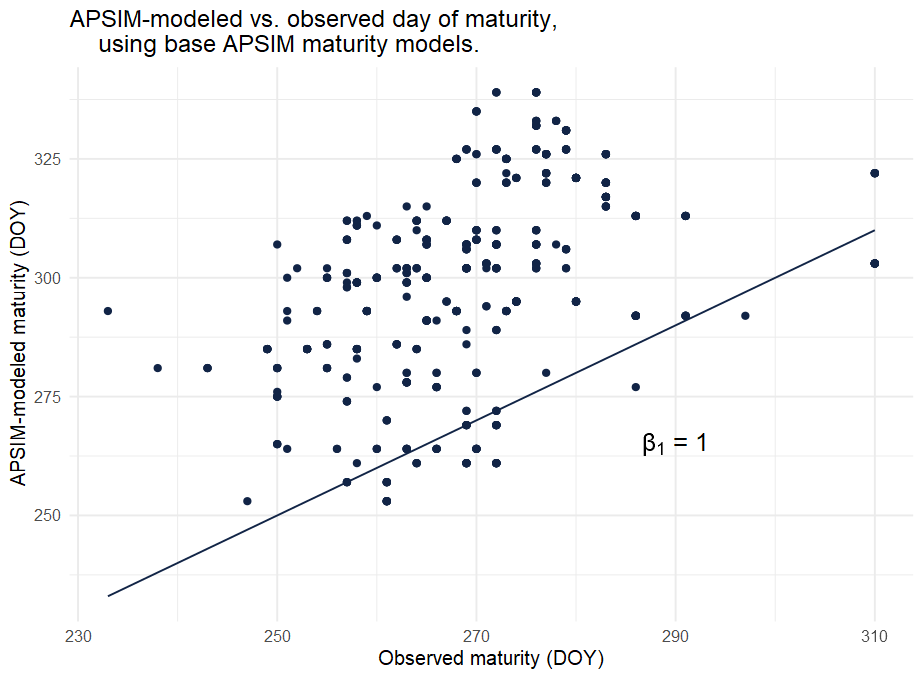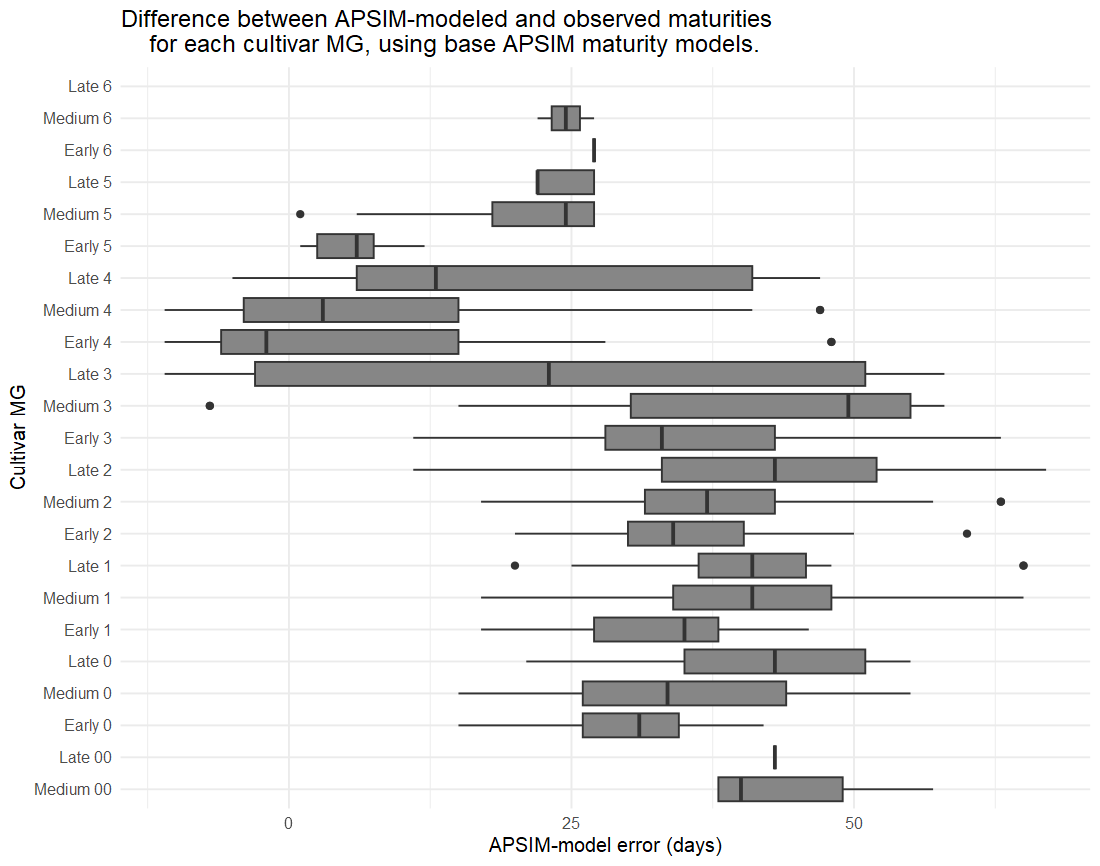

`R2 = 0.1892`

On the left is a scatterplot of predicted maturity date versus observed maturity date. On the right, we have box and whisker plot of the difference between predicted and observed values, based on the internal maturity model that was used. From the above graphs, we can see that using the base APSIM models, APSIM consistently overestimates how long the crop takes to reach maturity.

> Continue Adjusting the Model
* Change parameters, terms, etc. and evaluate how they impact model fitness. Parameter searches are a way to do this systematically.
* Model residuals (error) are useful for telling you where the model might be failing. Heteroskedasticity in error can tell you where the model isn’t predicting accurately. Patterns in error can key you into underlying factors that your model may not be accounting for.
* When making comparisons of model fitness, keep the evaluation data and criteria consistent.
* Simple well-fitting models are more robust than complex well-fitting models.

So! Let’s create new maturity models, based on our observed data. APSIM maturity models are defined by the accumulated GDD needed to reach each APSIM stage of development. So we need to, for each cultivar maturity, model the number of growing degree days that were needed to reach each APSIM stage of development.

Dataset one contains the trial IDs, day of observation, recorded R stage. Dataset two contains trial IDs, planting date, and cultivar maturity. Using trial IDs, we can match each observation in dataset one to the trial’s planting date in dataset two and get the date range between planting and observation for each record. By joining weather data, we can find the number of GDD accumulated between planting and observation for each of the records in dataset one.

Dataset one now contains:
* trial ID, day of observation, recorded R stage, cultivar maturity, accumulated GDD.

We have everything we need to create APSIM-compatible crop maturity models. We need our models to predict GDD, so we will perform a regression with GDD as the dependent variable.

Models within models: I chose a mixed linear model here for its ability to make predictions within classes and borrow strength between them. We will talk about these kinds of models later on.

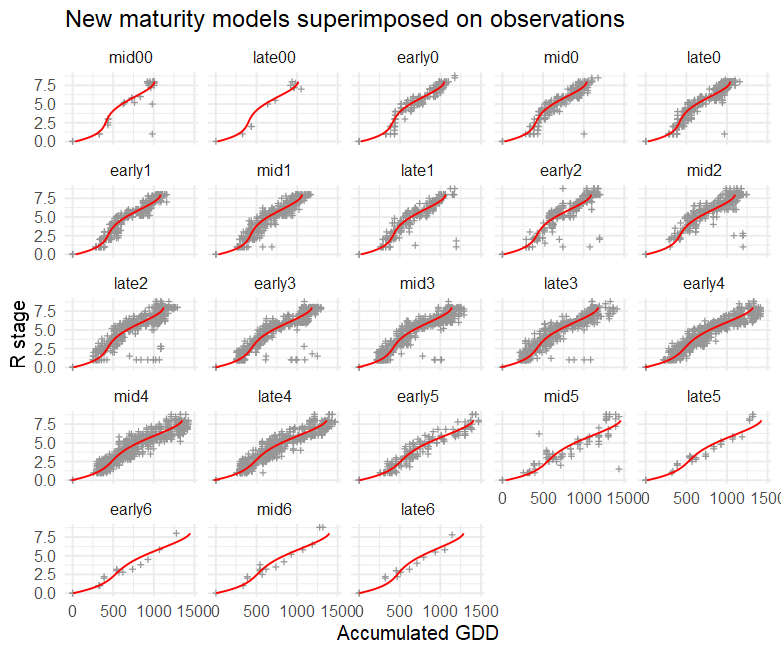



Using these models, we can predict the accumulated GDD value of each R stage for each cultivar maturity.




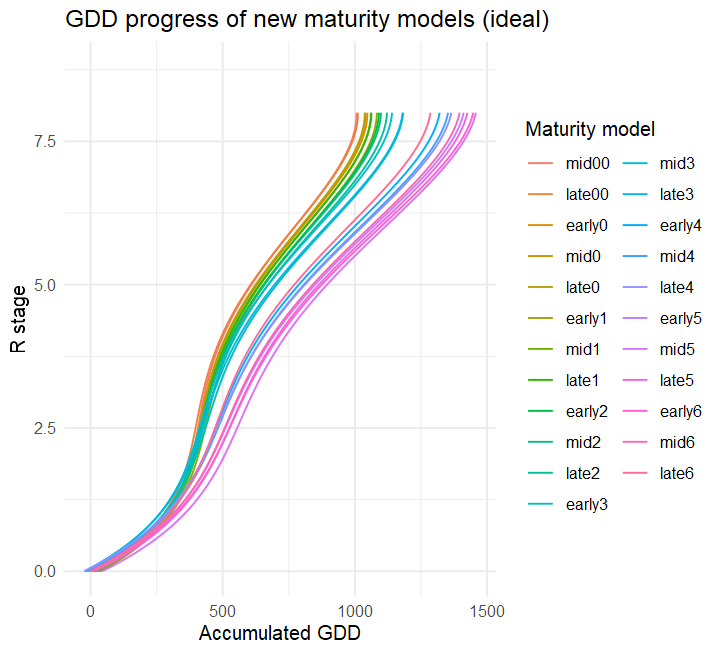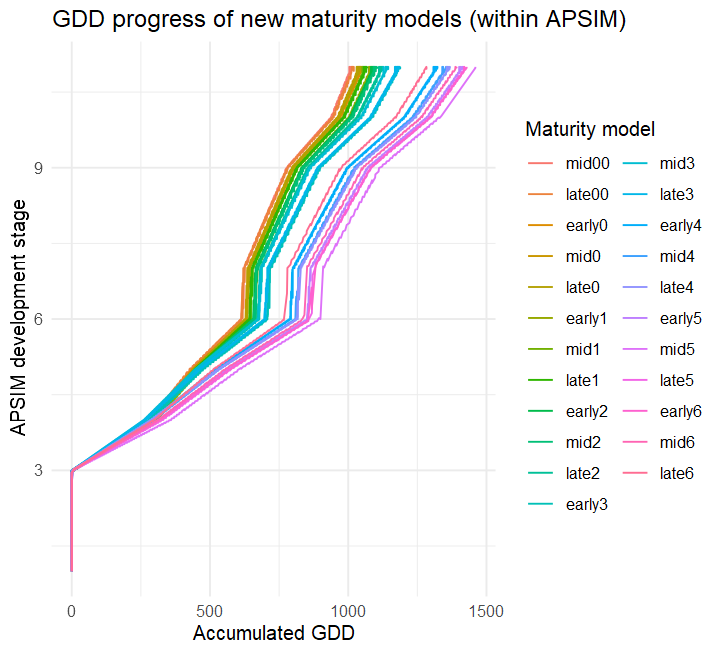

In APSIM the maturity models aren’t defined by a single equation, but by the GDD needed to complete each stage of development. We can use these ideal models to get the parameters of the new maturity models as they will be implemented. APSIM works using its own staging system, not the R stages, so we also need to translate each R stage to its equivalent APSIM stage parameter.


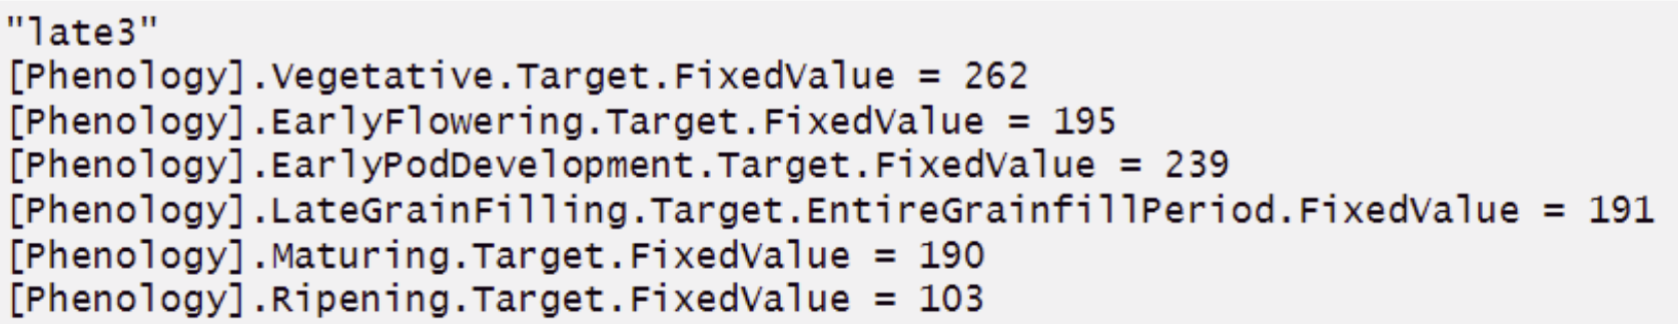


Let’s try again to evaluate how well APSIM is simulating our crop’s development. Using the same method as before, we can compare APSIM predictions of maturity to our recorded values.



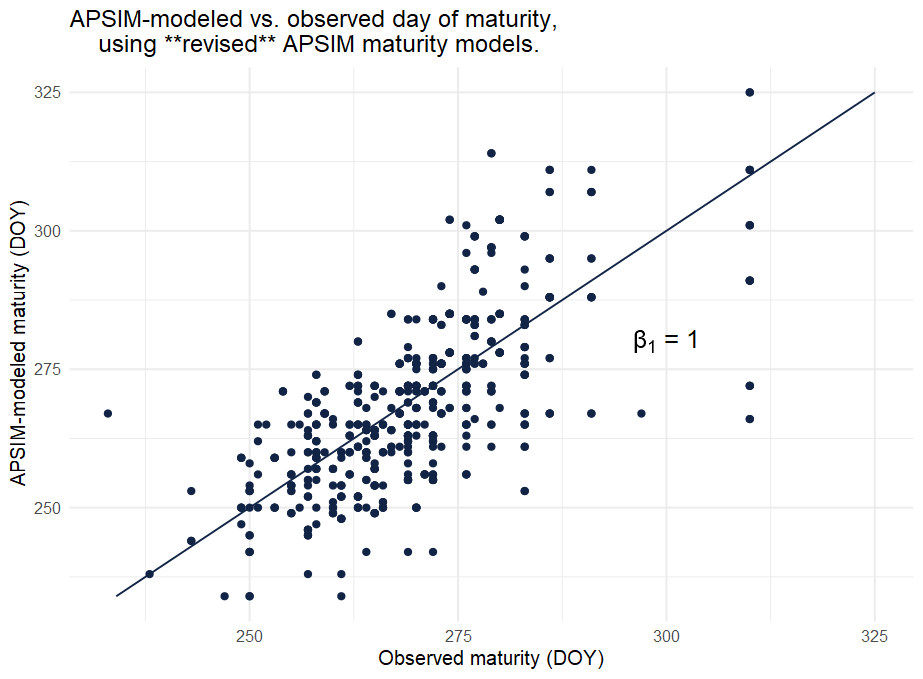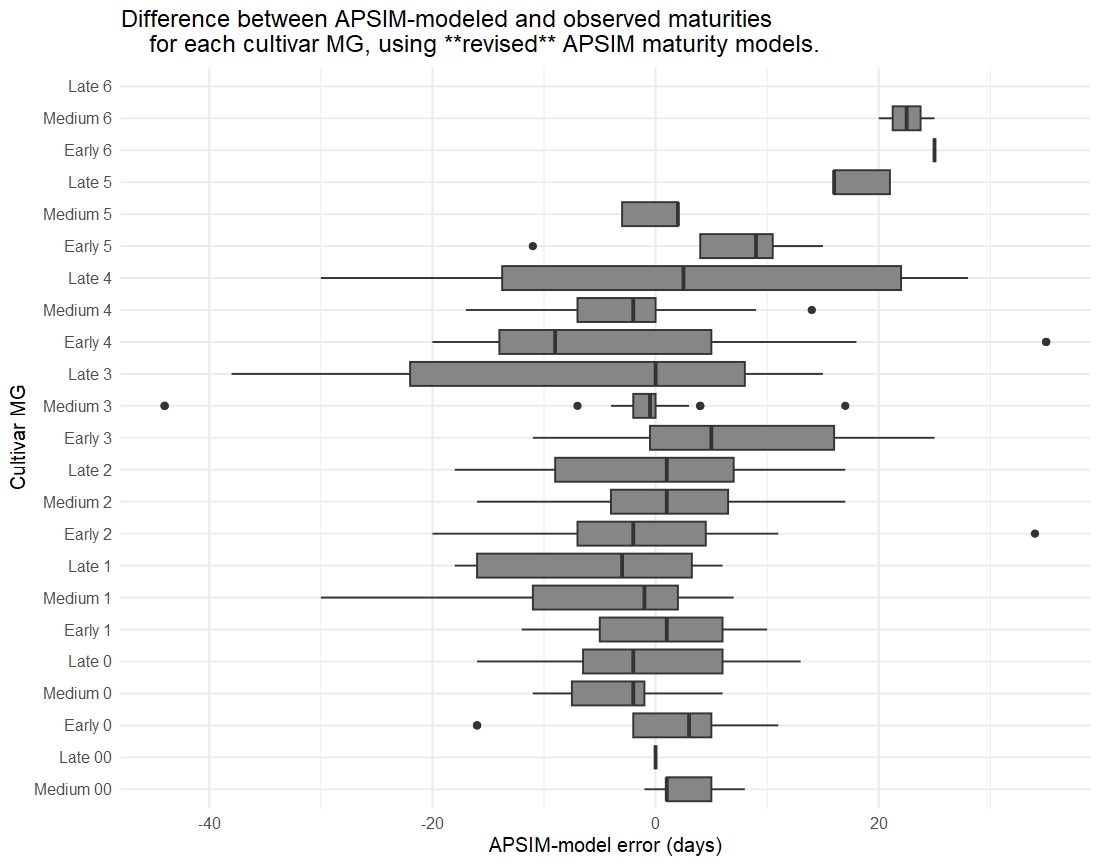

`R2 = 0.6322`

How does this compare to our previous result?

> Document Everything
* Document your work and progress as you go along. You never know when you may need to come back to something, and it will make it much easier on you when you write up your research later on.
* If you write code, comment it thoroughly.
